In [1]:
import numpy as np
import pandas as pd
from statistics import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataset
df = pd.read_csv("final.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   team           984 non-null    object
 1   result         928 non-null    object
 2   margin         927 non-null    object
 3   br             504 non-null    object
 4   toss           871 non-null    object
 5   bat            756 non-null    object
 6   opposition     984 non-null    object
 7   ground         984 non-null    object
 8   date           984 non-null    int64 
 9   url            984 non-null    object
 10  scrapped_date  984 non-null    object
dtypes: int64(1), object(10)
memory usage: 84.7+ KB


In [4]:
df.head()

,team,result,margin,br,toss,bat,opposition,ground,date,url,scrapped_date
0,India,lost,4 wickets,23,lost,NaN,England,Leeds,1974,https://stats.espncricinfo.com/ci/engine/stats...,2021-02-05
1,India,lost,6 wickets,37,won,1st,England,The Oval,1974,https://stats.espncricinfo.com/ci/engine/stats...,2021-02-05
2,India,lost,202 runs,NaN,lost,2nd,England,Lord's,1975,https://stats.espncricinfo.com/ci/engine/stats...,2021-02-05
3,India,won,10 wickets,181,lost,2nd,South Africa,Leeds,1975,https://stats.espncricinfo.com/ci/engine/stats...,2021-02-05
4,India,lost,4 wickets,7,won,1st,New Zealand,Manchester,1975,https://stats.espncricinfo.com/ci/engine/stats...,2021-02-05


In [5]:
#Summary of N/A Value
df.isnull().sum()

team               0
result            56
margin            57
br               480
toss             113
bat              228
opposition         0
ground             0
date               0
url                0
scrapped_date      0
dtype: int64

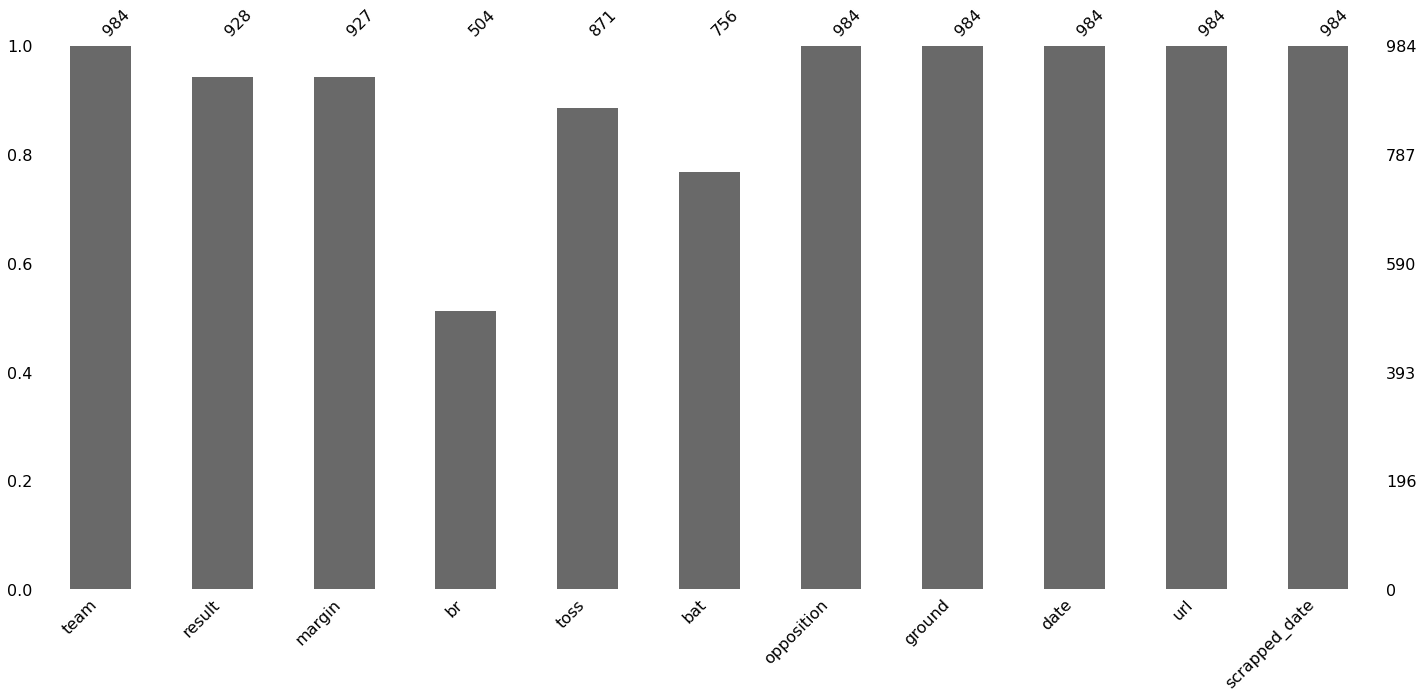

In [6]:
import missingno as msno
msno.bar(df);

In [7]:
df['toss'] = df['toss'].map( {'lost':0, 'won':1,})

In [8]:
df['result'] = df['result'].map( {'lost':0, 'won':1,})

In [9]:
df['bat'] = df['bat'].map( {'1st':1, '2nd':2,})

In [10]:
df=df.drop(['url','scrapped_date','date'],axis=1)

In [11]:
df

,team,result,margin,br,toss,bat,opposition,ground
0,India,0.0,4 wickets,23,0.0,NaN,England,Leeds
1,India,0.0,6 wickets,37,1.0,1.0,England,The Oval
2,India,0.0,202 runs,NaN,0.0,2.0,England,Lord's
3,India,1.0,10 wickets,181,0.0,2.0,South Africa,Leeds
4,India,0.0,4 wickets,7,1.0,1.0,New Zealand,Manchester
...,...,...,...,...,...,...,...,...
979,India,NaN,NaN,NaN,NaN,NaN,South Africa,Lucknow
980,India,NaN,NaN,NaN,NaN,NaN,South Africa,Kolkata
981,India,0.0,66 runs,NaN,0.0,2.0,Australia,Sydney
982,India,0.0,51 runs,NaN,0.0,2.0,Australia,Sydney


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   team        984 non-null    object 
 1   result      928 non-null    float64
 2   margin      927 non-null    object 
 3   br          504 non-null    object 
 4   toss        871 non-null    float64
 5   bat         643 non-null    float64
 6   opposition  984 non-null    object 
 7   ground      984 non-null    object 
dtypes: float64(3), object(5)
memory usage: 61.6+ KB


In [13]:
import os
def to_int(x):
    '''
    This function will try to convert a string into an integer if it is possible,
    else it will remain as np.nan
    '''
    try:
        return int(x)
    except:
        return np.nan
df['br'] = df['br'].replace('-', np.nan)
df['br'] = df['br'].apply(lambda x : to_int(x))
df['br'] = df['br'].fillna(df['br'].mean())

In [14]:
df

,team,result,margin,br,toss,bat,opposition,ground
0,India,0.0,4 wickets,23.000000,0.0,NaN,England,Leeds
1,India,0.0,6 wickets,37.000000,1.0,1.0,England,The Oval
2,India,0.0,202 runs,40.634497,0.0,2.0,England,Lord's
3,India,1.0,10 wickets,181.000000,0.0,2.0,South Africa,Leeds
4,India,0.0,4 wickets,7.000000,1.0,1.0,New Zealand,Manchester
...,...,...,...,...,...,...,...,...
979,India,NaN,NaN,40.634497,NaN,NaN,South Africa,Lucknow
980,India,NaN,NaN,40.634497,NaN,NaN,South Africa,Kolkata
981,India,0.0,66 runs,40.634497,0.0,2.0,Australia,Sydney
982,India,0.0,51 runs,40.634497,0.0,2.0,Australia,Sydney


In [15]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [16]:
df.isnull().sum()

team          0
result        0
margin        0
br            0
toss          0
bat           0
opposition    0
ground        0
dtype: int64

In [17]:
df

,team,result,margin,br,toss,bat,opposition,ground
0,India,0.0,4 wickets,23.000000,0.0,2.0,England,Leeds
1,India,0.0,6 wickets,37.000000,1.0,1.0,England,The Oval
2,India,0.0,202 runs,40.634497,0.0,2.0,England,Lord's
3,India,1.0,10 wickets,181.000000,0.0,2.0,South Africa,Leeds
4,India,0.0,4 wickets,7.000000,1.0,1.0,New Zealand,Manchester
...,...,...,...,...,...,...,...,...
979,India,1.0,6 wickets,40.634497,1.0,2.0,South Africa,Lucknow
980,India,1.0,6 wickets,40.634497,1.0,2.0,South Africa,Kolkata
981,India,0.0,66 runs,40.634497,0.0,2.0,Australia,Sydney
982,India,0.0,51 runs,40.634497,0.0,2.0,Australia,Sydney


In [18]:
#SWEETVIZ Repot
import sweetviz as sv
dataset_report = sv.analyze(df)
dataset_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


Text(0, 0.5, 'Count')

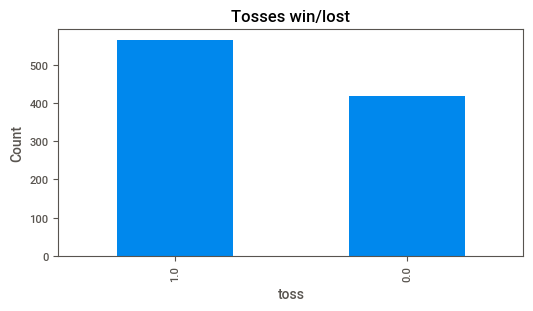

In [19]:
df['toss'].value_counts().plot.bar(figsize=(6,3),title='Tosses win/lost')
plt.xlabel('toss')
plt.ylabel('Count')

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

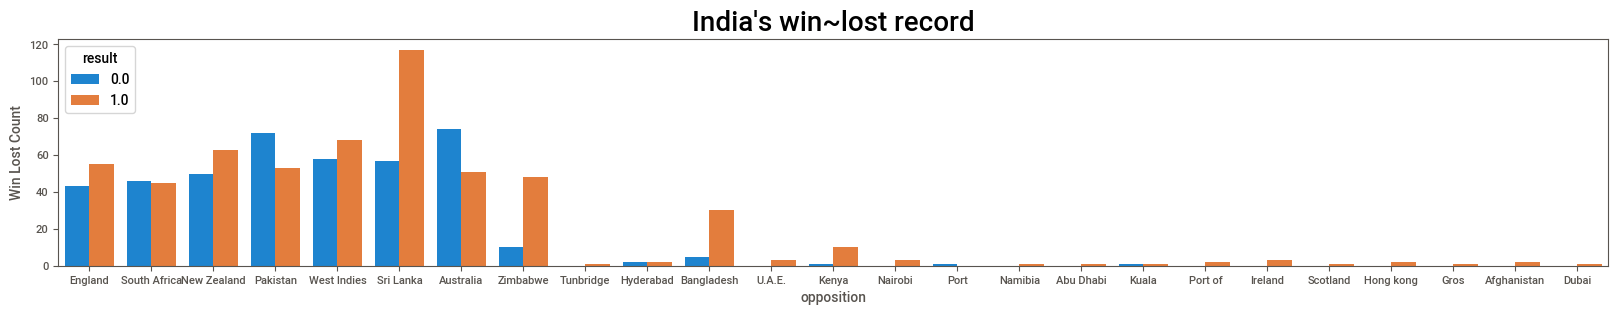

In [20]:
plt.figure(figsize=(20,3), facecolor='w')
sns.countplot(x="opposition",data=df,hue="result")
plt.title("India's win~lost record", size=20)
plt.xlabel("opposition", size=10)
plt.ylabel("Win Lost Count", size=10)
plt.xticks(size=8)
plt.yticks(size=8)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

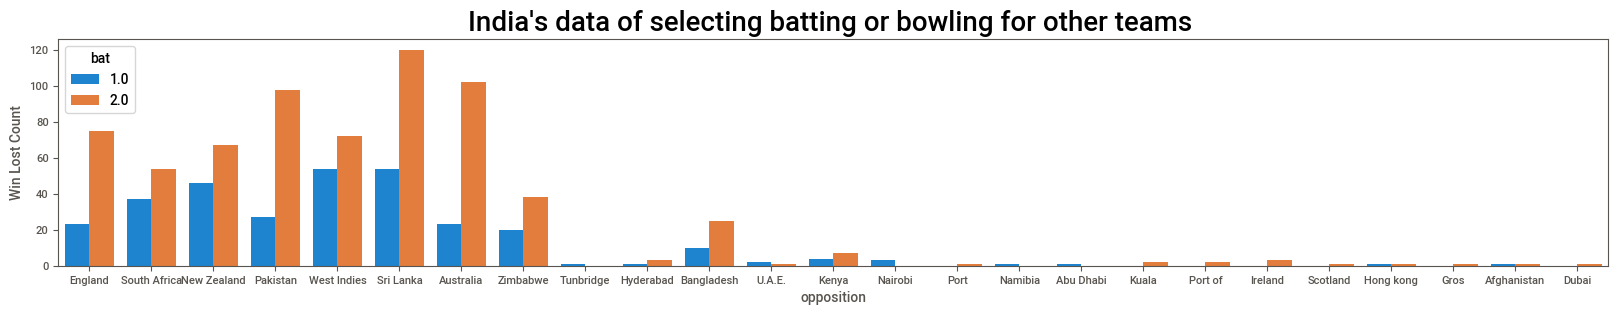

In [21]:
plt.figure(figsize=(20,3), facecolor='w')
sns.countplot(x="opposition",data=df,hue="bat")
plt.title("India's data of selecting batting or bowling for other teams ", size=20)
plt.xlabel("opposition", size=10)
plt.ylabel("Win Lost Count", size=10)
plt.xticks(size=8)
plt.yticks(size=8)

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

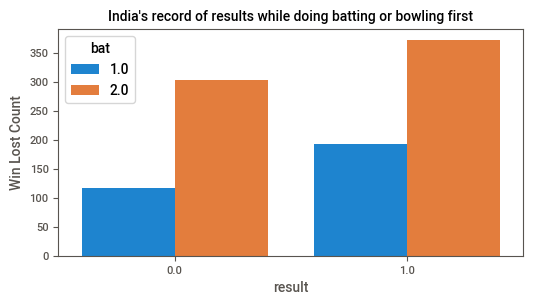

In [22]:
plt.figure(figsize=(6,3), facecolor='w')
sns.countplot(x="result",data=df,hue="bat")
plt.title("India's record of results while doing batting or bowling first", size=10)
plt.xlabel("result", size=10)
plt.ylabel("Win Lost Count", size=10)
plt.xticks(size=8)
plt.yticks(size=8)

In [23]:
grouped = df.groupby(["opposition", "ground"])
grouped.sum()

result          br  toss   bat
opposition  ground                                     
Abu Dhabi   Dhabi           1.0   40.634497   1.0   1.0
Afghanistan Dhaka           1.0  106.000000   1.0   2.0
            Southampton     1.0   40.634497   1.0   1.0
Australia   Adelaide        2.0  182.903491   2.0  12.0
            Ahmedabad       2.0   67.634497   1.0   5.0
...                         ...         ...   ...   ...
Zimbabwe    Pune            1.0   27.000000   1.0   2.0
            Rajkot          1.0   40.634497   0.0   1.0
            Sharjah         4.0  266.268994   4.0   9.0
            Singapore       1.0   40.634497   0.0   1.0
            Vadodara        1.0   40.634497   0.0   1.0

[390 rows x 4 columns]

In [24]:
ground_count = df.groupby(["opposition","ground"])["ground"].count()
print(ground_count)

opposition   ground     
Abu Dhabi    Dhabi          1
Afghanistan  Dhaka          1
             Southampton    1
Australia    Adelaide       6
             Ahmedabad      3
                           ..
Zimbabwe     Pune           1
             Rajkot         1
             Sharjah        5
             Singapore      1
             Vadodara       1
Name: ground, Length: 390, dtype: int64


In [25]:
grouped_df = df.groupby("opposition")
grouped_lists = grouped_df["ground"].apply(list)
grouped_lists = grouped_lists.reset_index()
print(grouped_lists)

      opposition                                             ground
0      Abu Dhabi                                            [Dhabi]
1    Afghanistan                               [Dhaka, Southampton]
2      Australia  [Melbourne, Sydney, Sydney, Melbourne, Sydney,...
3     Bangladesh  [Chattogram, Chandigarh, Sharjah, Colombo, Dha...
4          Dubai                                            [Dubai]
5        England  [Leeds, The Oval, Lord's, Ahmedabad, Jalandhar...
6           Gros                                            [Islet]
7      Hong kong                                   [Karachi, Dubai]
8      Hyderabad       [Hyderabad, Hyderabad, Hyderabad, Hyderabad]
9        Ireland                     [Belfast, Bengaluru, Hamilton]
10         Kenya  [Cuttack, Bengaluru, Gwalior, Kolkata, Bristol...
11         Kuala                                   [Lumpur, Lumpur]
12       Nairobi                        [Nairobi, Nairobi, Nairobi]
13       Namibia                                

In [26]:
df["opposition"].value_counts()

Sri Lanka       174
West Indies     126
Pakistan        125
Australia       125
New Zealand     113
England          98
South Africa     91
Zimbabwe         58
Bangladesh       35
Kenya            11
Hyderabad         4
Ireland           3
Nairobi           3
U.A.E.            3
Port of           2
Kuala             2
Afghanistan       2
Hong kong         2
Port              1
Dubai             1
Gros              1
Abu Dhabi         1
Scotland          1
Namibia           1
Tunbridge         1
Name: opposition, dtype: int64

In [27]:
df["ground"].value_counts()

Sharjah       72
Colombo       70
Dhaka         42
Melbourne     22
Kolkata       22
              ..
Taunton        1
Jammu          1
Chelmsford     1
Moratuwa       1
Glasgow        1
Name: ground, Length: 112, dtype: int64